In [11]:
import os

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
from matplotlib.ticker import FormatStrFormatter
from scipy.optimize import curve_fit

In [12]:
sample_dict = {
    "0p0": "ytso_0_try6_retry12",
    "0p2": "ytso_0p2_try8_8_1_2_retry_6_optimal",
    "0p5": "ytso_0p5_try2_scale4_try23_LP_2",
    "0p8": "ytso_0p8_try2_scale4_try3_optimal",
    "1p0": "ytso_1p0_try2_scale2_FSOnly_Optimal",
}

line_style = {"0p0": "-", "0p2": "-", "0p5": "-", "0p8": "-", "1p0": "-"}

color_dict = {
    "0p0": "red",
    "0p2": "peru",
    "0p5": "orange",
    "0p8": "olivedrab",
    "1p0": "violet",
}

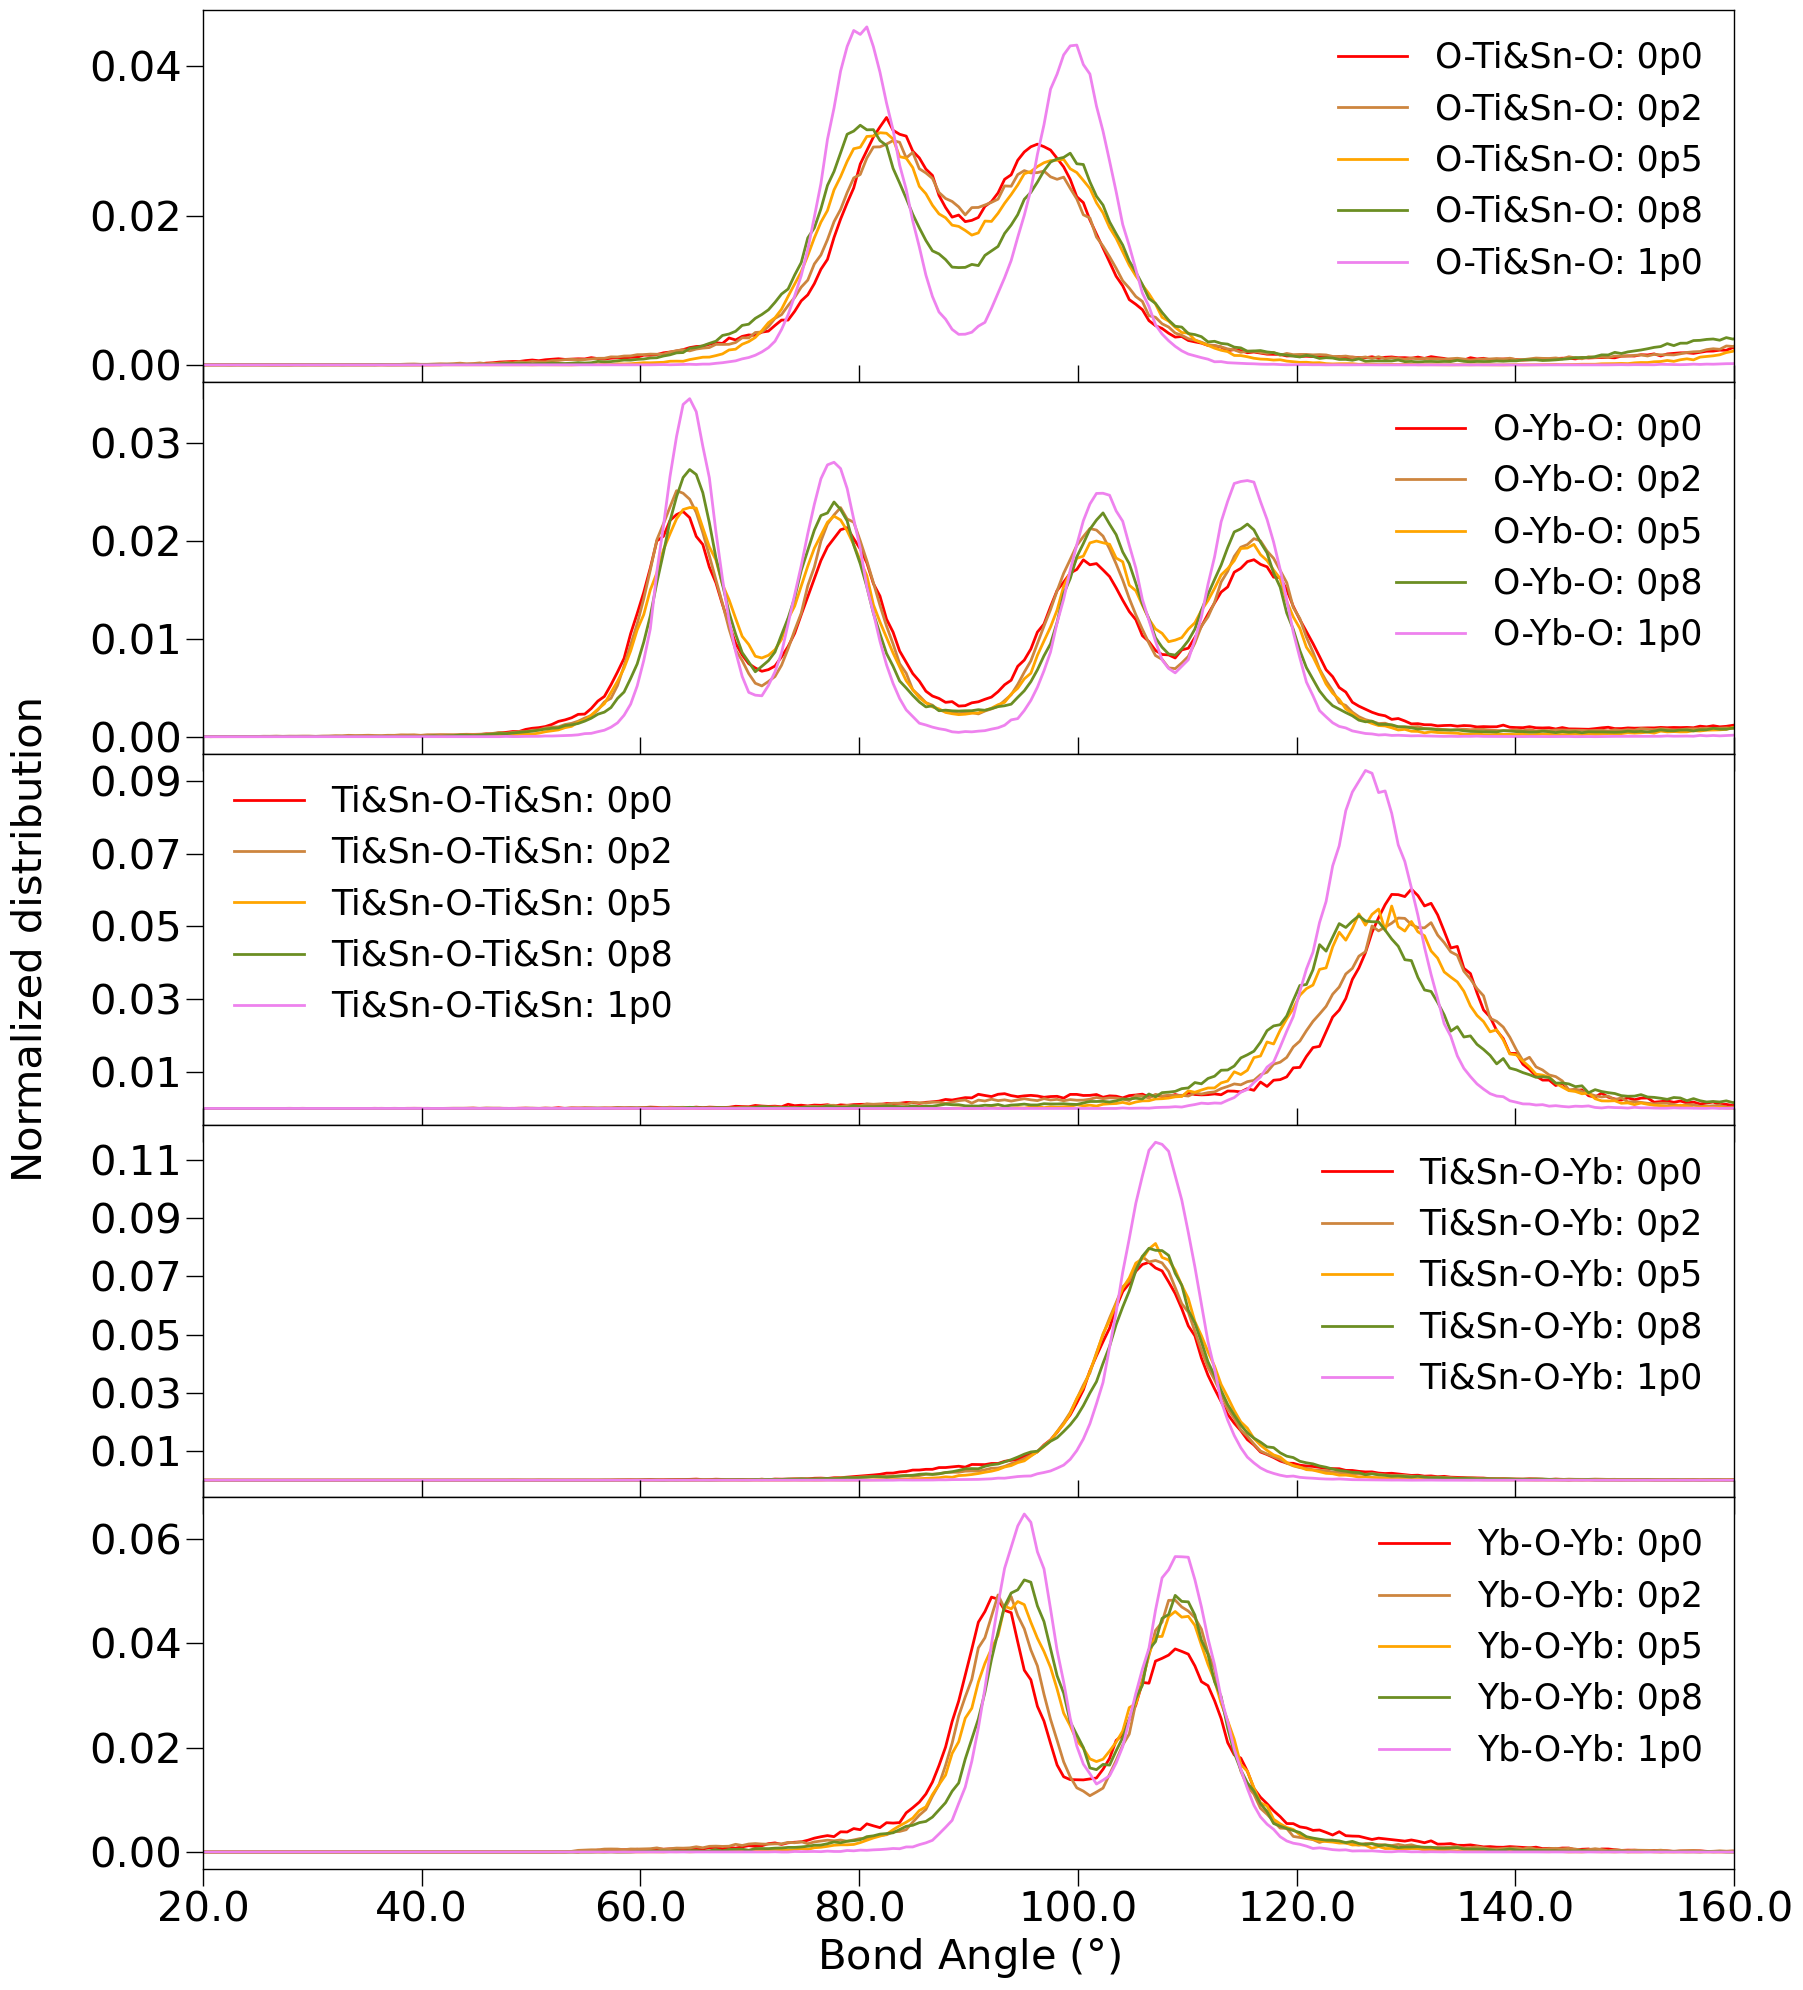

In [13]:
f = plt.figure(figsize=(18, 20))
gs = gridspec.GridSpec(5, 1, height_ratios=[1 for _ in range(5)], hspace=0)
axes = list()
for i in range(5):
    axes.append(plt.subplot(gs[i, 0]))

all_data = dict()

for key, item in sample_dict.items():
    with open(os.path.join(item, "ytso_0_triplets_all.hist"), "r") as file_in:
        for _ in range(6):
            line = file_in.readline()
        while line:
            line = file_in.readline()
            if line:
                if "b323" in line:
                    for _ in range(3):
                        line = file_in.readline()
                    b323_angle = []
                    b323_norm = []
                    for _ in range(300):
                        line = file_in.readline()
                        b323_angle.append(float(line.split()[0]))
                        b323_norm.append(float(line.split()[2]))
                if "b313" in line:
                    for _ in range(3):
                        line = file_in.readline()
                    b313_angle = []
                    b313_norm = []
                    for _ in range(300):
                        line = file_in.readline()
                        b313_angle.append(float(line.split()[0]))
                        b313_norm.append(float(line.split()[2]))
                if "b232" in line:
                    for _ in range(3):
                        line = file_in.readline()
                    b232_angle = []
                    b232_norm = []
                    for _ in range(300):
                        line = file_in.readline()
                        b232_angle.append(float(line.split()[0]))
                        b232_norm.append(float(line.split()[2]))
                if "b231" in line:
                    for _ in range(3):
                        line = file_in.readline()
                    b231_angle = []
                    b231_norm = []
                    for _ in range(300):
                        line = file_in.readline()
                        b231_angle.append(float(line.split()[0]))
                        b231_norm.append(float(line.split()[2]))
                if "b131" in line:
                    for _ in range(3):
                        line = file_in.readline()
                    b131_angle = []
                    b131_norm = []
                    for _ in range(300):
                        line = file_in.readline()
                        b131_angle.append(float(line.split()[0]))
                        b131_norm.append(float(line.split()[2]))

    angle_dict = {
        0: {
            "label": "O-Ti&Sn-O",
            "color": "blue",
            "data": {"angle": b323_angle, "norm": b323_norm},
        },
        1: {
            "label": "O-Yb-O",
            "color": "peru",
            "data": {"angle": b313_angle, "norm": b313_norm},
        },
        2: {
            "label": "Ti&Sn-O-Ti&Sn",
            "color": "red",
            "data": {"angle": b232_angle, "norm": b232_norm},
        },
        3: {
            "label": "Ti&Sn-O-Yb",
            "color": "olivedrab",
            "data": {"angle": b231_angle, "norm": b231_norm},
        },
        4: {
            "label": "Yb-O-Yb",
            "color": "orange",
            "data": {"angle": b131_angle, "norm": b131_norm},
        },
    }

    all_data[key] = dict()

    for i in range(5):
        all_data[key][i] = [
            angle_dict[i]["data"]["angle"],
            angle_dict[i]["data"]["norm"],
        ]
        axes[i].plot(
            angle_dict[i]["data"]["angle"],
            angle_dict[i]["data"]["norm"],
            line_style[key],
            color=color_dict[key],
            label=angle_dict[i]["label"] + ": " + key,
            linewidth=2,
        )

        axes[i].set_xlim([20, 160])
        axes[i].tick_params(axis="x", direction="out", length=12, width=1, labelsize=30)
        if i != 4:
            axes[i].set_xticklabels([])
        if i > 0:
            axes[i].xaxis.set_ticks_position("both")
        axes[i].tick_params(axis="y", direction="out", length=12, width=1, labelsize=30)
        axes[i].spines["left"].set_linewidth(1)
        axes[i].spines["right"].set_linewidth(1)
        axes[i].spines["top"].set_linewidth(1)
        axes[i].spines["bottom"].set_linewidth(1)
        if i == 4:
            axes[i].set_xlabel(r"Bond Angle ($\degree$)", fontdict={"size": 30})
        # axes[i].set_ylabel(r"$g(r)$", fontdict={'size': 30})
        axes[i].legend(fontsize=25, frameon=False)
        axes[i].yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
        if i == 4:
            axes[i].xaxis.set_major_formatter(FormatStrFormatter("%.1f"))

_ = axes[3].set_yticks([0.01, 0.03, 0.05, 0.07, 0.09, 0.11])
_ = axes[2].set_yticks([0.01, 0.03, 0.05, 0.07, 0.09])
_ = axes[1].set_yticks([0.0, 0.01, 0.02, 0.03])
axes[1].set_ylabel(r"Normalized distribution", fontdict={"size": 30})
axes[1].yaxis.set_label_coords(-0.10, -0.5)
plt.tight_layout()
_ = f.savefig("triplets_all.png", format="png", dpi=600)

In [14]:
def func(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        ctr = params[i]
        amp = params[i + 1]
        wid = params[i + 2]
        y = y + amp * np.exp(-(((x - ctr) / wid) ** 2))
    return y

In [15]:
guess_dict = {
    0: [80.0, 0.03, 15.0, 100.0, 0.03, 15.0],
    1: [65.0, 0.02, 10.0, 75.0, 0.02, 10.0, 105.0, 0.02, 10.0, 115.0, 0.02, 10.0],
    2: [130.0, 0.05, 15.0],
    3: [110.0, 0.05, 10.0],
    4: [90.0, 0.03, 15.0, 110.0, 0.03, 15.0]
}

all_fit = all_data.copy()
all_params = list()

for i in range(5):
    all_params.append([])
    for key in all_data.keys():
        x = np.asarray(all_data[key][i][0])
        y = np.asarray(all_data[key][i][1])

        popt, pcov = curve_fit(func, x, y, p0=guess_dict[i])
        
        num_peaks = int(len(guess_dict[i]) / 3)
        ave_width = 0.0
        for j in range(num_peaks):
            ave_width += popt[2 + j * 3]
        ave_width /= float(num_peaks)
        
        all_params[i].append(ave_width)

        fit = func(x, *popt)
        all_fit[key][i] = [x, fit]

doping_level = [0.0, 0.2, 0.5, 0.8, 1.0]

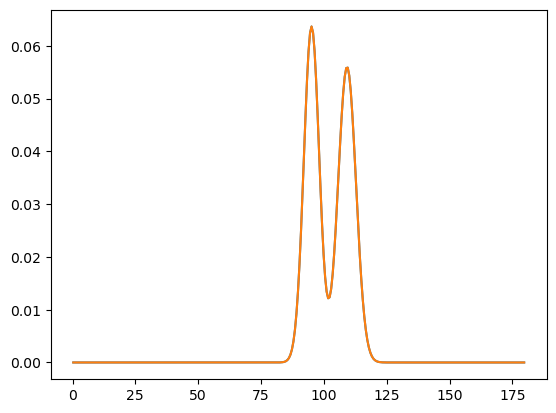

In [16]:
plt.plot(all_data["1p0"][4][0], all_data["1p0"][4][1])
plt.plot(all_fit["1p0"][4][0], all_fit["1p0"][4][1])

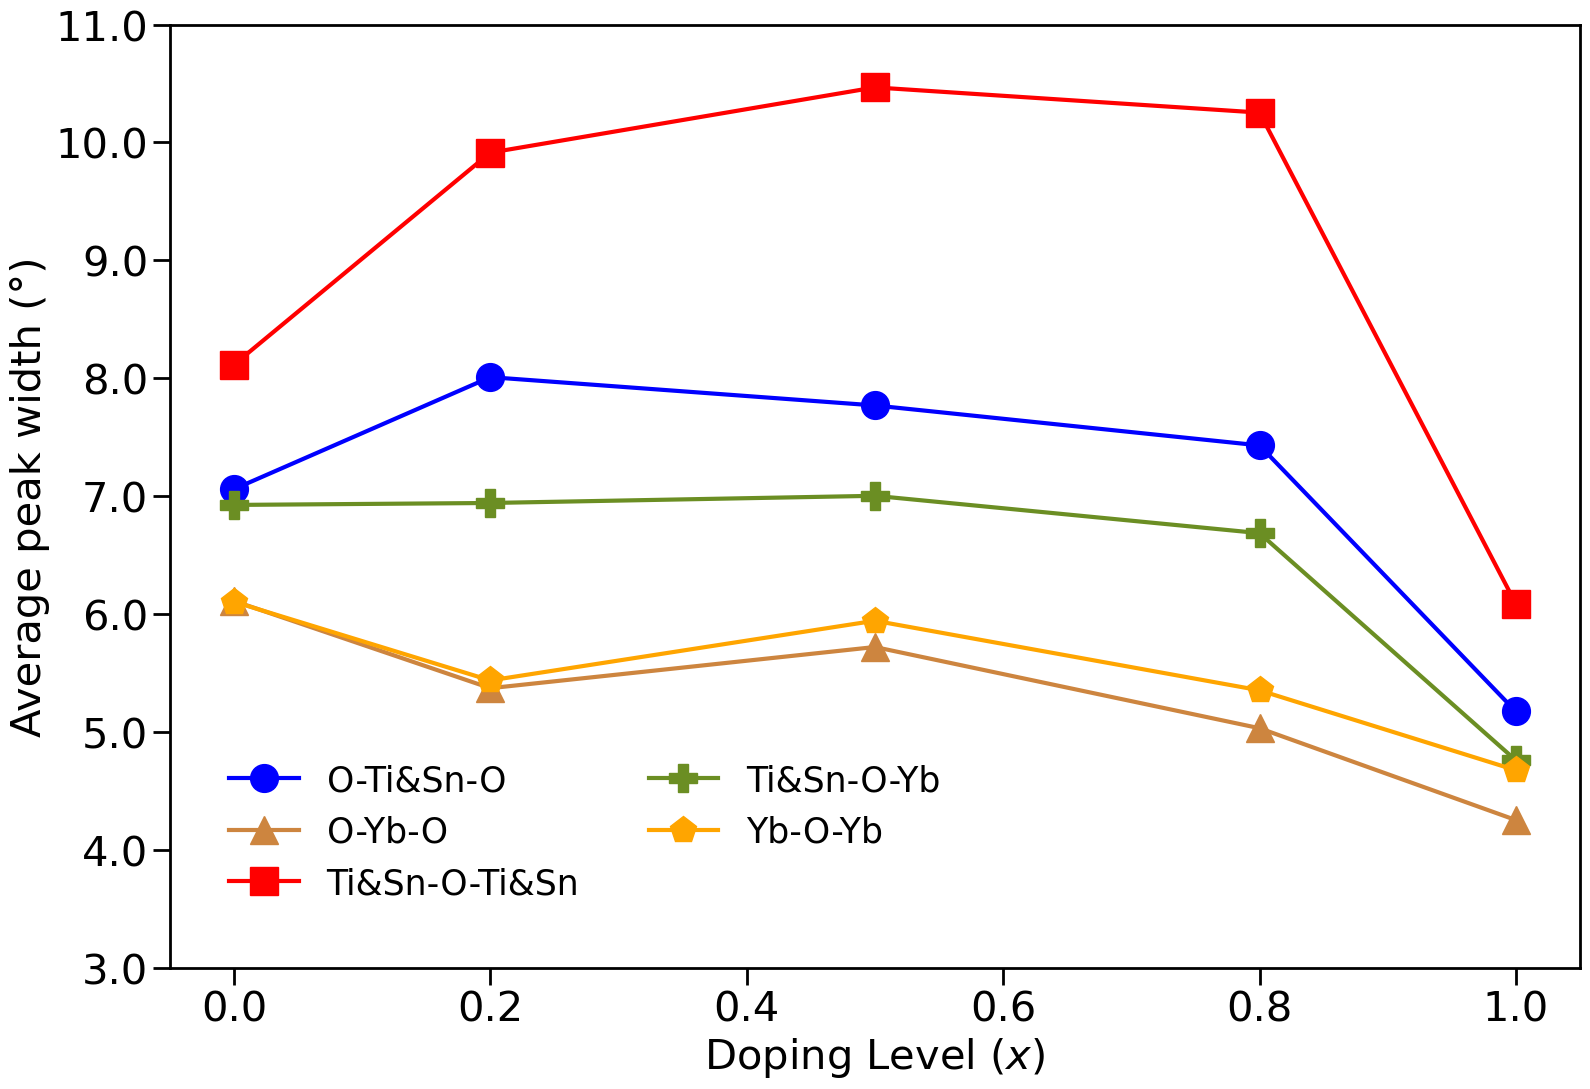

In [17]:
f = plt.figure(figsize=(16, 11))
gs = gridspec.GridSpec(1, 1)
ax = plt.subplot(gs[0, 0])
# ax2 = ax.twinx()

markers = ["o", "^", "s", "P", "p"]

# ax.plot(doping_level, all_params[0], label=angle_dict[0]["label"],
#         color=angle_dict[0]["color"],
#         linewidth=3, marker=markers[0], ms=20)
# ax.plot(doping_level, all_params[4], label=angle_dict[4]["label"],
#         color=angle_dict[4]["color"],
#         linewidth=3, marker=markers[4], ms=20)

for i in range(5):
    ax.plot(doping_level, all_params[i],
            label=angle_dict[i]["label"],
            color=angle_dict[i]["color"],
            linewidth=3, marker=markers[i], ms=20)

ax.set_ylim([3, 11])
# ax2.set_ylim([3, 15])

ax.tick_params(axis="x", direction="out", length=12, width=2, labelsize=30)
ax.tick_params(axis="y", direction="out", length=12, width=2, labelsize=30)
# ax2.tick_params(axis="y", direction="out", length=12, width=2, labelsize=30)
ax.spines["left"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.spines["top"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.set_xlabel(r"Doping Level ($x$)", fontdict={"size": 30})
ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.xaxis.set_major_formatter(FormatStrFormatter("%.1f"))
# ax2.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
# _ = ax2.set_yticks([3., 9., 15., 21.])
ax.set_ylabel(r"Average peak width (°)", fontdict={"size": 30})
# ax2.set_ylabel(r"Average peak width (°)", fontdict={"size": 30})

ax.legend(ncol=2, fontsize=25, frameon=False, loc="upper left", bbox_to_anchor=(0.02, 0.25))
# ax2.legend(fontsize=25, frameon=False, loc="upper right", bbox_to_anchor=(0.89, 0.99))

ax.arrow(0.07, 22.6, -0.06, 0, linewidth=5, head_width=0.6, head_length=0.02,
         fc="black")
ax.arrow(0.92, 21.8, 0.06, 0, linewidth=5, head_width=0.6, head_length=0.02,
         fc="black")
ax.set_xlim([-0.05, 1.05])

plt.tight_layout()
_ = f.savefig("distortion_all.png", format="png", dpi=600)